In [1]:
import requests
from bs4 import BeautifulSoup
from time import sleep

In [3]:
def GetNews(url0):
    """
    Returns a tuple with url0, date, author, description, title, final_text, rubrics, diff.
    Parameters:
    
    url0 is a link to the news (string)
    """
    page0 = requests.get(url0)
    soup0 = BeautifulSoup(page0.text, 'lxml')
    author = soup0.find_all('meta', {'name' : 'author'})[0].attrs['content']
    date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].attrs['content']
    title = soup0.find_all('meta', {'property' : 'og:title'})[0].attrs['content']
    description = soup0.find_all('meta', {'name' : 'description'})[0].attrs['content']
    rubrics = [r.text for r in soup0.find_all('p')[0].find_all('a')]
    diff = soup0.find_all('span', {'class' : 'difficult-value'})[0].text
    text_list = soup0.find_all('p', {'class' : None})
    text = [t.text for t in text_list]
    final_text = ' '.join(text)
    final_text = final_text.replace('\n', ' ')
    
    return url0, date, author, description, title, final_text, rubrics, diff

In [4]:
url = 'https://nplus1.ru/' # сохраняем
page = requests.get(url) # загружаем страницу по ссылке

In [5]:
soup = BeautifulSoup(page.text, 'lxml') 

In [6]:
urls = []

for link in soup.find_all('a'):
    if '/news' in link.get('href'):
        urls.append(link.get('href'))
urls

['/news/2019/12/03/mail',
 '/news/2019/12/03/Vikram-was-found',
 '/news/2019/12/03/pipistrel',
 '/news/2019/12/03/first-pandemic',
 '/news/2019/12/02/deepcomposer',
 '/news/2019/12/02/elizabeth-i-tacitus',
 '/news/2019/12/02/bowling',
 '/news/2019/12/02/habsburg-jaw',
 '/news/2019/12/02/ice-gps',
 '/news/2019/12/02/four-striped-mice',
 '/news/2019/12/02/siberian-sauropod',
 '/news/2019/12/02/mi38t',
 '/news/2019/12/02/hg-puma',
 '/news/2019/11/29/moon-map',
 '/news/2019/12/02/vizski',
 '/news/2019/12/02/container',
 '/news/2019/12/02/perlan',
 '/news/2019/11/30/all-the-work-and-no-buckling',
 '/news/2019/11/30/deepchina',
 '/news/2019/11/30/robotic-scientist',
 '/news/2019/11/30/robotic-scientist',
 '/news/2019/12/03/first-pandemic',
 '/news/2019/11/29/coldest-reaction',
 '/news/2019/11/25/d-meson-tau-decay',
 '/news/2019/11/29/fossil-ice-in-chondrite',
 '/news/2019/11/27/regular-inversion',
 '/news/2019/11/27/autotrophic-e-coli',
 '/news/2019/11/25/delay-gratification-crows',
 '/news/

In [7]:
full_urls = []

for u in urls:
    res = 'https://nplus1.ru' + u
    full_urls.append(res) 

full_urls

['https://nplus1.ru/news/2019/12/03/mail',
 'https://nplus1.ru/news/2019/12/03/Vikram-was-found',
 'https://nplus1.ru/news/2019/12/03/pipistrel',
 'https://nplus1.ru/news/2019/12/03/first-pandemic',
 'https://nplus1.ru/news/2019/12/02/deepcomposer',
 'https://nplus1.ru/news/2019/12/02/elizabeth-i-tacitus',
 'https://nplus1.ru/news/2019/12/02/bowling',
 'https://nplus1.ru/news/2019/12/02/habsburg-jaw',
 'https://nplus1.ru/news/2019/12/02/ice-gps',
 'https://nplus1.ru/news/2019/12/02/four-striped-mice',
 'https://nplus1.ru/news/2019/12/02/siberian-sauropod',
 'https://nplus1.ru/news/2019/12/02/mi38t',
 'https://nplus1.ru/news/2019/12/02/hg-puma',
 'https://nplus1.ru/news/2019/11/29/moon-map',
 'https://nplus1.ru/news/2019/12/02/vizski',
 'https://nplus1.ru/news/2019/12/02/container',
 'https://nplus1.ru/news/2019/12/02/perlan',
 'https://nplus1.ru/news/2019/11/30/all-the-work-and-no-buckling',
 'https://nplus1.ru/news/2019/11/30/deepchina',
 'https://nplus1.ru/news/2019/11/30/robotic-sci

In [9]:
info = []
for link in full_urls:
    res = GetNews(link)
    info.append(res)
    sleep(2)
    print(link + ' ........ done') 

https://nplus1.ru/news/2019/12/03/mail........ done
https://nplus1.ru/news/2019/12/03/Vikram-was-found........ done
https://nplus1.ru/news/2019/12/03/pipistrel........ done
https://nplus1.ru/news/2019/12/03/first-pandemic........ done
https://nplus1.ru/news/2019/12/02/deepcomposer........ done
https://nplus1.ru/news/2019/12/02/elizabeth-i-tacitus........ done
https://nplus1.ru/news/2019/12/02/bowling........ done
https://nplus1.ru/news/2019/12/02/habsburg-jaw........ done
https://nplus1.ru/news/2019/12/02/ice-gps........ done
https://nplus1.ru/news/2019/12/02/four-striped-mice........ done
https://nplus1.ru/news/2019/12/02/siberian-sauropod........ done
https://nplus1.ru/news/2019/12/02/mi38t........ done
https://nplus1.ru/news/2019/12/02/hg-puma........ done
https://nplus1.ru/news/2019/11/29/moon-map........ done
https://nplus1.ru/news/2019/12/02/vizski........ done
https://nplus1.ru/news/2019/12/02/container........ done
https://nplus1.ru/news/2019/12/02/perlan........ done
https://n

In [11]:
import pandas as pd
df = pd.DataFrame(info) 

In [15]:
df.columns = ['link', 'date', 'author', 'desc', 
             'title', 'text', 'rub', 'diffc'] 

In [17]:
df['diffc'] = df['diffc'].astype(float) 

In [19]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 8 columns):
link      29 non-null object
date      29 non-null object
author    29 non-null object
desc      29 non-null object
title     29 non-null object
text      29 non-null object
rub       29 non-null object
diffc     29 non-null float64
dtypes: float64(1), object(7)
memory usage: 1.9+ KB


In [21]:
import seaborn as sns

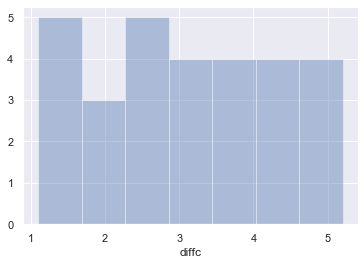

In [27]:
sns.set() 
sns.distplot(df['diffc'], kde=False, bins = 7) 

In [28]:
!pip install selenium 

In [29]:
import selenium

In [30]:
from selenium import webdriver as wd

In [33]:
br = wd.Chrome(r'D:\Downloads\chromedriver_win32\chromedriver.exe') 

In [34]:
br.get("http://cikrf.ru/services/lk_address/?do=find_by_uik")

In [36]:
uik_field = br.find_element_by_css_selector('#uik')

In [37]:
uik = 244
uik_field.send_keys(uik) 

In [38]:
reg_field = br.find_element_by_name('subject')
reg_field.send_keys("Ивановская область") 

In [39]:
button = br.find_element_by_link_text("Отправить запрос")
button.click() 

In [41]:
page = br.page_source

In [42]:
soup = BeautifulSoup(page, 'lxml')

In [46]:
address = ''
for p in soup.findAll('p'):
    if 'Адрес помещения для голосования:' in p.text:
        address = p.text

In [51]:
def get_address(uik, reg):
    br.get("http://cikrf.ru/services/lk_address/?do=find_by_uik")
    br.implicitly_wait(1) 
    uik_field = br.find_element_by_css_selector('#uik')
    reg_field = br.find_element_by_name('subject')
    uik_field.send_keys(uik) 
    reg_field.send_keys(reg) 
    button = br.find_element_by_link_text("Отправить запрос")
    button.click() 
    page = br.page_source
    soup = BeautifulSoup(page, 'lxml')
    address = ''
    for p in soup.findAll('p'):
        if 'Адрес помещения для голосования:' in p.text:
            address = p.text
    return address

In [50]:
get_address(245, "Московская область")

'Адрес помещения для голосования: Российская Федерация, Московская область, Дмитровский городской округ, город Дмитров, улица Внуковская, дом 40, ООО "Дмитровское учебно-производственное предприятие"'

In [52]:
for i in range(200, 221):
    try:
        a = get_address(i, "Московская область")
        print(a)
    except:
        print(i, 'Error!')
        a = None
        pass

Адрес помещения для голосования: 140250, Московская область, городской округ Воскресенск, поселок Белоозерский, улица 50 лет Октября, 6, здание дома культуры
Адрес помещения для голосования: 140250, Московская область, городской округ Воскресенск, поселок Белоозерский, улица Комсомольская, 1 А, здание Фаустовской школы
Адрес помещения для голосования: 140240, Московская область, городской округ Воскресенск, деревня Золотово, улица Моховая, 67, здание Золотовской школы
Адрес помещения для голосования: 140240, Московская область, городской округ Воскресенск, деревня Золотово, улица Моховая, 67, здание Золотовской школы
Адрес помещения для голосования: 140230, Московская область, городской округ Воскресенск, поселок Виноградово, улица Коммунистическая, 1 А, здание администрации
Адрес помещения для голосования: 140220, Московская область, городской округ Воскресенск, село Конобеево, улица Учхоз, 7, здание УОХ "Леоновское"
Адрес помещения для голосования: 140220, Московская область, городск

In [53]:
br.get('http://www.biblio-globus.ru/')

In [54]:
search = br.find_element_by_id('search_string')
search.send_keys('Python') 

In [56]:
button = br.find_element_by_id('search_submit')
button.click() 

In [57]:
page = br.page_source

In [58]:
soup = BeautifulSoup(page)

In [60]:
raw_items = soup.findAll('a', {'class':'name'}) 
items = []
for i in raw_items:
    items.append(i.text) 

In [64]:
raw_authors = soup.findAll('div', {'class':'author'})
authors = []
for a in raw_authors:
    authors.append(a.text)

In [65]:
authors

['',
 'Д. Хеллман',
 'М.  Лутц',
 'Б. Бенгфорт, Р. Билбро, Т. Охеда',
 'П. Бэрри',
 'Б. Пэйн',
 'К. Элбон',
 'П. Джоши',
 'З. Шоу',
 'Дж. Мюллер']

In [66]:
nextp = br.find_element_by_class_name('next_page')

In [67]:
nextp.click() 